In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("Electric Vehicle Sales by State in India.csv")
print(df)

         Year Month_Name       Date                     State  \
0      2014.0        jan   1/1/2014            Andhra Pradesh   
1      2014.0        jan   1/1/2014            Andhra Pradesh   
2      2014.0        jan   1/1/2014            Andhra Pradesh   
3      2014.0        jan   1/1/2014            Andhra Pradesh   
4      2014.0        jan   1/1/2014            Andhra Pradesh   
...       ...        ...        ...                       ...   
96840  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96841  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96842  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96843  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96844  2023.0        dec  12/1/2023  Andaman & Nicobar Island   

                           Vehicle_Class Vehicle_Category Vehicle_Type  \
0                        ADAPTED VEHICLE           Others       Others   
1                   AGRICULTURAL TRACTOR           Others       Others 

In [18]:
import pandas as pd

data = {
    'date': ['2014-12-20', None, '2025/12/22', '20-12-2025'],
    'value': [10, 20, None, 40]
}
df = pd.DataFrame(data)

# Handle missing values
df['value'] = df['value'].fillna(df['value'].mean())
df['date'] = df['date'].ffill()

# Convert 'date' column to datetime without specifying dayfirst
df['date'] = pd.to_datetime(df['date'], errors='coerce')

print(df)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')


        date      value
0 2014-12-20  10.000000
1 2014-12-20  20.000000
2        NaT  23.333333
3        NaT  40.000000


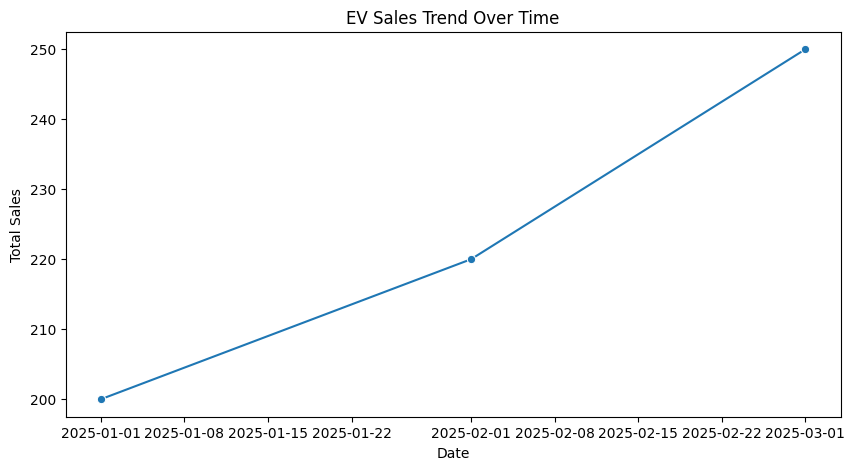

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame
data = {
    'date': ['2025-01', '2025-01', '2025-02', '2025-02', '2025-03', '2025-03'],
    'state': ['CA', 'TX', 'CA', 'TX', 'CA', 'TX'],
    'category': ['Sedan', 'SUV', 'Sedan', 'SUV', 'Sedan', 'SUV'],
    'sales': [120, 80, 130, 90, 150, 100]
}
df = pd.DataFrame(data)

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m')

# Trend over time (total sales)
plt.figure(figsize=(10,5))
time_trend = df.groupby('date')['sales'].sum().reset_index()
sns.lineplot(data=time_trend, x='date', y='sales', marker='o')
plt.title('EV Sales Trend Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.show()

In [21]:
import pandas as pd
data = {
    'date': ['2025-12-20', '2025-12-21', '2025-12-22'],
    'state': ['CA', 'TX', 'NY'],
    'category': ['Sedan', 'SUV', 'Truck'],
    'sales': [120, 80, 90]
}
df = pd.DataFrame(data)

df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract month and day
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()  # optional, adds day of the week

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le_state = LabelEncoder()
le_category = LabelEncoder()

df['state_encoded'] = le_state.fit_transform(df['state'])
df['category_encoded'] = le_category.fit_transform(df['category'])

# One-Hot Encoding (for linear models or neural networks)
df_onehot = pd.get_dummies(df, columns=['state', 'category'], drop_first=True)

print(df)
print(df_onehot)


        date state category  sales  month  day   weekday  state_encoded  \
0 2025-12-20    CA    Sedan    120     12   20  Saturday              0   
1 2025-12-21    TX      SUV     80     12   21    Sunday              2   
2 2025-12-22    NY    Truck     90     12   22    Monday              1   

   category_encoded  
0                 1  
1                 0  
2                 2  
        date  sales  month  day   weekday  state_encoded  category_encoded  \
0 2025-12-20    120     12   20  Saturday              0                 1   
1 2025-12-21     80     12   21    Sunday              2                 0   
2 2025-12-22     90     12   22    Monday              1                 2   

   state_NY  state_TX  category_Sedan  category_Truck  
0     False     False            True           False  
1     False      True           False           False  
2      True     False           False            True  


In [27]:
print(df.columns)


Index(['date', 'state', 'category', 'sales', 'month', 'day', 'weekday',
       'state_encoded', 'category_encoded', 'Year'],
      dtype='object')


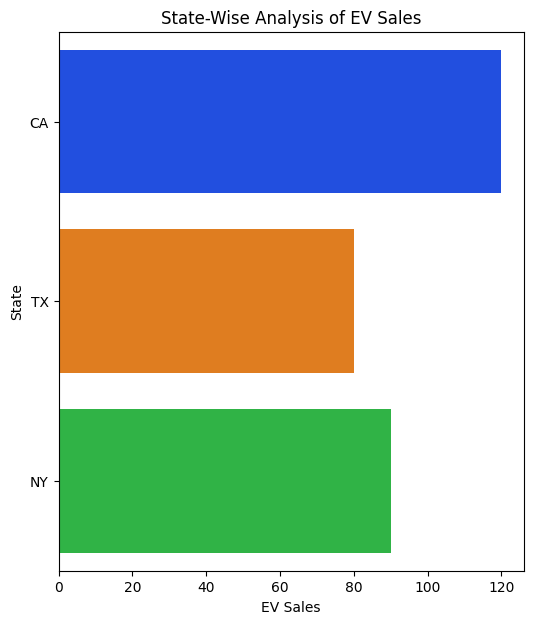

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,7))
sns.barplot(y='state', x='sales', data=df, hue='state', palette='bright', dodge=False, legend=False)
plt.title('State-Wise Analysis of EV Sales')
plt.xlabel('EV Sales')
plt.ylabel('State')
plt.show()


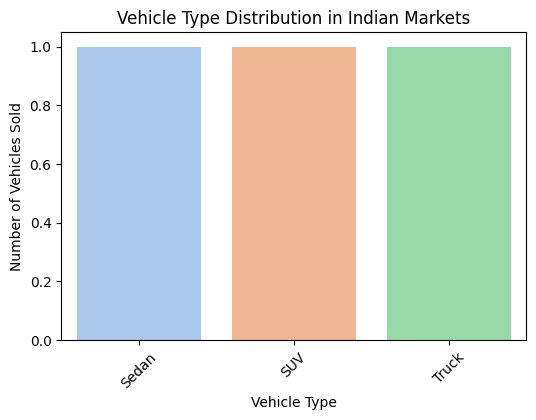

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x='category',
    hue='category',       # assign the column to hue
    order=vehicle_counts.index,
    palette='pastel',
    dodge=False,          # prevent splitting bars
    legend=False          # hide redundant legend
)
plt.title('Vehicle Type Distribution in Indian Markets')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Vehicles Sold')
plt.xticks(rotation=45)
plt.show()



In [47]:
# Count the number of each vehicle type
vehicle_counts = df['category'].value_counts()
print(vehicle_counts)

['date', 'state', 'category', 'sales', 'month', 'day', 'weekday',
 'state_encoded', 'category_encoded', 'Year']


category
Sedan    1
SUV      1
Truck    1
Name: count, dtype: int64


['date',
 'state',
 'category',
 'sales',
 'month',
 'day',
 'weekday',
 'state_encoded',
 'category_encoded',
 'Year']

In [52]:
# Count the number of each vehicle type
vehicle_counts = df['category'].value_counts()

# Display the counts
print(vehicle_counts)

vehicle_counts = df['category'].value_counts()
vehicle_counts.name = 'count'
vehicle_counts.index.name = 'Vehicle_Type'
vehicle_counts




category
Sedan    1
SUV      1
Truck    1
Name: count, dtype: int64


Vehicle_Type
Sedan    1
SUV      1
Truck    1
Name: count, dtype: int64

In [53]:
# Generate basic statistics for all numeric columns except 'Year'
df.drop(columns=['Year']).describe()


,date,sales,month,day,state_encoded,category_encoded
count,3,3.000000,3.0,3.0,3.0,3.0
mean,2025-12-21 00:00:00,96.666667,12.0,21.0,1.0,1.0
min,2025-12-20 00:00:00,80.000000,12.0,20.0,0.0,0.0
25%,2025-12-20 12:00:00,85.000000,12.0,20.5,0.5,0.5
50%,2025-12-21 00:00:00,90.000000,12.0,21.0,1.0,1.0
75%,2025-12-21 12:00:00,105.000000,12.0,21.5,1.5,1.5
max,2025-12-22 00:00:00,120.000000,12.0,22.0,2.0,2.0
std,NaN,20.816660,0.0,1.0,1.0,1.0


In [54]:
# Check for duplicates
print(df.duplicated().sum())

# Check for missing values
print(df.isnull().sum())


0
date                0
state               0
category            0
sales               0
month               0
day                 0
weekday             0
state_encoded       0
category_encoded    0
Year                0
dtype: int64


In [55]:
df.head()

,date,state,category,sales,month,day,weekday,state_encoded,category_encoded,Year
0,2025-12-20,CA,Sedan,120,12,20,Saturday,0,1,2025
1,2025-12-21,TX,SUV,80,12,21,Sunday,2,0,2025
2,2025-12-22,NY,Truck,90,12,22,Monday,1,2,2025


In [56]:
df.columns.nunique()

10

In [57]:
df.tail()

,date,state,category,sales,month,day,weekday,state_encoded,category_encoded,Year
0,2025-12-20,CA,Sedan,120,12,20,Saturday,0,1,2025
1,2025-12-21,TX,SUV,80,12,21,Sunday,2,0,2025
2,2025-12-22,NY,Truck,90,12,22,Monday,1,2,2025


In [58]:
df.Year.value_counts()

Year
2025    3
Name: count, dtype: int64